In [45]:
# Import our libraries we are going to use for our data analysis.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read the file in as pandas dataframe

In [46]:
file_path = '/Users/Suha/Insight/coding_challenge/test_challenge/ingestion/lending_club/loan.csv'
loan = pd.read_csv(file_path, low_memory=False)

In [47]:
# if we loose the working dataframe, no need to reload the data
df = loan 
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


# Visualization

A couple of cursory questions are -  what is the yearly trend in the loan amount and interest rates?How is the interest rate , loan amount , number of loans , total loans distributed by grade? Lets see if we can answer them just by looking at the visualisation plot.




### Prepare the time as date time and add the month and year column 

In [69]:
issue_d_todate = pd.to_datetime(df.issue_d)

In [70]:
df = df.merge(issue_d_todate, left_index=True, right_index=True )

In [71]:
df['issue_year'] = df['issue_d_y'].dt.year
df['issue_month'] = df['issue_d_y'].dt.month

In [72]:
req_cols = ["loan_amnt" , 'grade', "int_rate", "loan_status" ,
            "issue_d_y","issue_year","issue_month","funded_amnt" ,
            "funded_amnt_inv"]
wrk_df = df[req_cols]

### How does interest rate change over time? And how does it vary by grade over time?

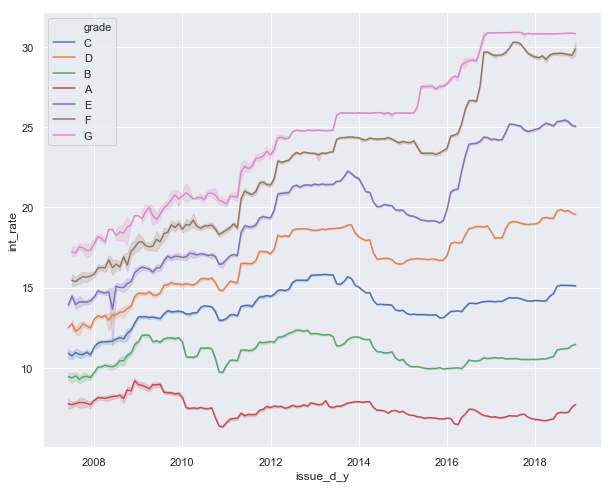

In [212]:
sns.set(style="darkgrid")

# Plot the interest rates for different grade
plt.figure(figsize=(10, 8))
sns.lineplot(x="issue_d_y", y="int_rate",
             hue="grade", 
             data=wrk_df)
# plt.savefig('viz1.png')
plt.show()

From the above graph we can see that the interst rate for grade band A more or less remains the same, while the interest rate for band G is moves higher. So it seems that higher the grade, higher the interest rate

### How does loan amount change over time? And how does it vary by grade over time?
The question here is how has the lendability changed over time? Loan amount is the amount of money requested by the buyer. while funded_amnt is the total amount commited at that point. funded_amnt_inv is the amount commited by the investor. It would be intersting to see how the total funded_amt and how the ratio of funded_amnt_inv/funded_amnt varies over time and grade?

In [ ]:
wrk_df[investor_amt_pct] = wrk_df["funded_amnt_inv"]/wrk_df["funded_amnt"]*100

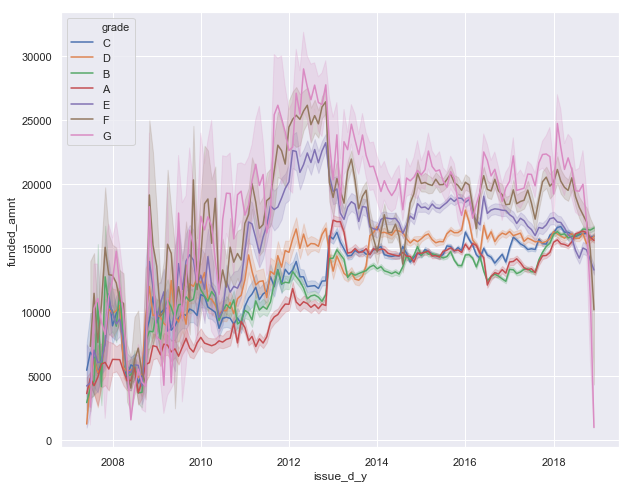

In [213]:
sns.set(style="darkgrid")

# Plot the funding amount for different grade
plt.figure(figsize=(10, 8))
sns.lineplot(x="issue_d_y", y="funded_amnt",
             hue="grade", 
             data=wrk_df)

# plt.savefig('viz2.png')
plt.show()


We also see that the funding amount for grade G is higher as compared to other bands overall. There is also a lot of variability for the band G as compared to other bands. During the crisis, the funding amount for all the grades went down significantly. The gap between loan funding for grades grew wider during 2011 to 2014. 

Lets us go ahead and see what percentage of the funding amount is provided by the investor

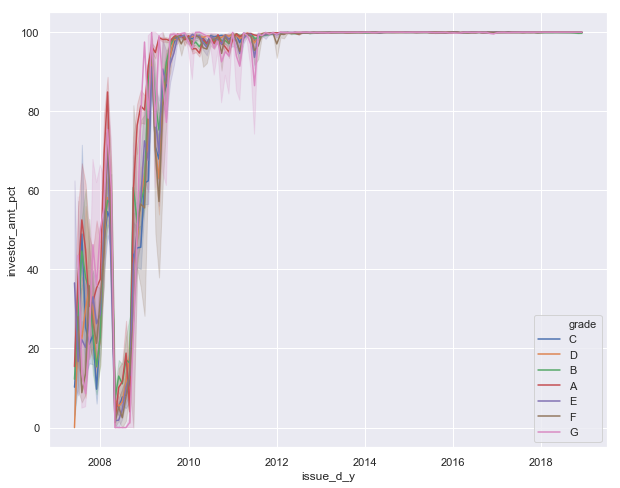

In [214]:
sns.set(style="darkgrid")

# Plot the investor funcding percentages for different grade
plt.figure(figsize=(10, 8))
sns.lineplot(x="issue_d_y", y="investor_amt_pct",
             hue="grade", 
             data=wrk_df)
# plt.savefig('viz3.png')
plt.show()

In [141]:
# loans between the said period with more than 90% being invested by the investor
high_investment_2008_2010 = wrk_df[(wrk_df["issue_year"] > 2008) &   (wrk_df["issue_year"] <= 2010) & (wrk_df["investor_amt_pct"] >90)]
high_investment_2010_2013 = wrk_df[(wrk_df["issue_year"] > 2010) &   (wrk_df["issue_year"] <= 2013) & (wrk_df["investor_amt_pct"] >90)]

In [138]:
# overall percentage of loans with more tha 90% investor investment for the said period
loans_invested_pct_2008_2010 = high_investment_2008_2010.shape[0]/wrk_df.shape[0] * 100
loans_invested_pct_2010_2013 = high_investment_2010_2013.shape[0]/wrk_df.shape[0] * 100

In [139]:
loans_invested_pct_2008_2010

0.7127096946566236

In [140]:
loans_invested_pct_2010_2013

9.268322460440896

From above we can see that the investor interest in the loans was very low during the economic crisis years. While it grew post that period.